In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import naive_bayes
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from bs4 import BeautifulSoup
from nltk.corpus import stopwords


In [5]:
data =pd.read_csv('/content/Amazon_Reviews.csv')
data.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,31-08-2015,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,31-08-2015,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,31-08-2015,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,31-08-2015,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,31-08-2015,1


In [6]:
data.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'sentiment'],
      dtype='object')

In [7]:
#for data properties
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

In [8]:
## code for sentiment analysis starts
# Adding a sentiment column to classify reviews as positive or negative
#positive =1 and negative =0

In [9]:
data['sentiment']=np.where(data['star_rating']==5.0,1,
                           np.where(data['star_rating']==4.0,1,0))

In [10]:
# Get unique values of product title colum
data['product_title'].unique()

array(['Fire HD 7, 7" HD Display, Wi-Fi, 8 GB'], dtype=object)

In [11]:
# we will choose one particular product for our analysis
prod_hosa=data.loc[data['product_title']=='Fire HD 7, 7" HD Display, Wi-Fi, 8 GB']
prod_hosa

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,31-08-2015,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,31-08-2015,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,31-08-2015,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,31-08-2015,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,31-08-2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,03-10-2014,1
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,03-10-2014,1
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",03-10-2014,1
30844,US,33485035,R36QVLQXMCZRSJ,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,143,163,N,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,03-10-2014,1


In [12]:
## split data into train and test

X=prod_hosa.drop('sentiment',axis=1)
Y=prod_hosa['sentiment']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [13]:
# we will remove now the html elements from the reviews

def removeHTML(raw_text):
  clean_HTML=BeautifulSoup(raw_text,'lxml').get_text()
  return clean_HTML

In [14]:
removeHTML('Lots of ads<br />Slow processing speed<br />Occasionally shuts down apps<br />WIFI keeps having authentication issues<br /><br />Was cheap for a tablet and now i know why.')

'Lots of adsSlow processing speedOccasionally shuts down appsWIFI keeps having authentication issuesWas cheap for a tablet and now i know why.'

In [15]:
# function to remove special characters and numbers from the reviews4961

def removeSpecialChar(raw_text):
  clean_SpecialChar=re.sub('[^a-zA-Z]',' ',raw_text)
  return clean_SpecialChar

In [16]:
removeSpecialChar("jainpayal1004@gmail.com")


'jainpayal     gmail com'

In [17]:
# function to convert all reviews into lower cases

def toLower(raw_text):
  clean_LowerCase=raw_text.lower().split()
  return (" ".join(clean_LowerCase))

In [18]:
# function to remove stop words from the reviews
def  removeStopWords(raw_text):
  stops=set(stopwords.words('english'))
  words =[ w for w in raw_text if not w in stops]
  return(" ".join(words))

In [19]:
X_train.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
29034,US,1113425,R3BDLOP3XKYYM5,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,love it,03-12-2014
4015,US,37264917,R2Z6MUY8GKH9PL,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Love my Fire HD 7,26-06-2015
4101,US,17964606,R27S3T7YOA16OP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,I like the Fire but I had some problems using ...,I like the Fire but I had some problems using ...,25-06-2015
9952,US,41424895,R1R4J1676Y1AHG,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,1,N,Y,No Google Play,"Nice tablet but doesn't allow Google play, Ama...",01-05-2015
7109,US,40238598,R93I942O7LM0K,B00LCHOCZY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,N,Five Stars,love it,21-05-2015


In [20]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from bs4 import BeautifulSoup
import re
import pandas as pd
import string

# Define your preprocessing functions
def removeHTML(raw_text):
    if isinstance(raw_text, str):
        clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()
        return clean_HTML
    else:
        return ""

def removeSpecialChar(text):
    # Remove special characters (keep alphanumeric and spaces)
    return ''.join(e for e in text if e.isalnum() or e.isspace())

def toLower(text):
    return text.lower()

def removeStopWords(text):
    # Example stop words list, expand as needed
    stop_words = set(['and', 'is', 'in', 'it', 'of', 'the'])
    return ' '.join([word for word in text.split() if word not in stop_words])

# Ensure 'review_body' is treated as strings and handle NaNs
X_train['review_body'] = X_train['review_body'].fillna('').astype(str)

# Process the text data
X_train_cleaned = []
for val in X_train['review_body']:
    val = removeHTML(val)            # Remove HTML tags
    val = removeSpecialChar(val)     # Remove special characters
    val = toLower(val)               # Convert to lowercase
    val = removeStopWords(val)       # Remove stop words
    X_train_cleaned.append(val)

# Optionally, replace the original column with the cleaned data
X_train['review_body_cleaned'] = X_train_cleaned


<ipython-input-22-08c24482fd9a>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()


In [23]:
# X_test_cleaned set

X_test_cleaned=[]
for val in X_test['review_body']:
  val=removeHTML(val)
  val=removeSpecialChar(val)
  val=toLower(val)
  removeStopWords(val)
  X_test_cleaned.append(val)

<ipython-input-22-08c24482fd9a>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()


In [24]:
X_train_cleaned

['love',
 'love my fire hd 7',
 'i like fire but i had some problems using books i did not know to press on side to get first part a book',
 'nice tablet but doesnt allow google play amazon has stopped fix called rooting so that you can use play store',
 'love',
 'love this',
 'my 8 year old loves his new fire',
 'awesomei just wish you could put what you want on main screen like a background picture like on an iphone not what app or book that you were lastim sure will happen thoughlove my kindles anyway',
 'im sure device just fine problem user i find confusing perplexing not easy to use',
 'a nice tablet for price apps available amazon are limited but works well for what i use for which reading online streaming music to my stereo via bluetooth',
 'love love whats not to like everything literally at your fingertips user friendly price right you look cool using were old have nothing but fun with our fire every day two arthritic thumbs up',
 'absolutely love',
 'excellent product',
 'it

In [25]:
## Vectorization

In [26]:
# We will convert a collection of raw docs to a matrix of Tf-Idf featuures..
#This is required so as to train the model using features instead of raw strings

tvec=TfidfVectorizer(use_idf=True ,
strip_accents='ascii' )
X_train_tvec=tvec.fit_transform(X_train_cleaned)

In [27]:
#Support vector classifier model
svr_lin=LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge',dual=False)
svr_lin.fit(X_train_tvec,Y_train)

LinearSVC(dual=False)

In [28]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers

svr_lin_predictions=svr_lin.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,svr_lin_predictions,output_dict=True)
data_report=pd.DataFrame(report).transpose().round(2)
cm=sns.light_palette("yellow",as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.750000,0.650000,0.700000,1018.000000
1,0.930000,0.960000,0.950000,5152.000000
accuracy,0.910000,0.910000,0.910000,0.910000
macro avg,0.840000,0.800000,0.820000,6170.000000
weighted avg,0.900000,0.910000,0.900000,6170.000000


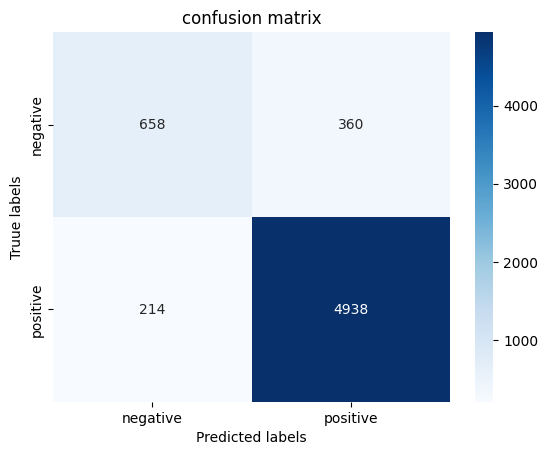

In [29]:
#confusion matrix

svr_lin_predictions=svr_lin.predict(tvec.transform(X_test_cleaned))
ax=plt.subplot()
cm=confusion_matrix(Y_test,svr_lin_predictions)
sns.heatmap(cm,annot=True,fmt='g',ax=ax,cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Truue labels');
ax.set_title('confusion matrix');
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive']);

In [30]:
# testing the model with sample 'Negative' review
demo_review = np.array(['three days of use and it broke very disappointed in this product it worked perfectly for exactly three days and could not be resuscitated it was very inexpensive so i did not want to pay half again the price to ship it back for an exchange so the company would do nothing when they sent me an inquiry as to product satisfaction'])
demo_review_X_test = tvec.transform(demo_review)
print(svr_lin.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [31]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Excellent product. Works well and performs as expected.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(svr_lin.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [32]:
# using Random forest model

random_forest=RandomForestClassifier()
random_forest.fit(X_train_tvec,Y_train)

RandomForestClassifier()

In [33]:
# Predict using training and testing data and display the accuracy ,f1 score ,precision
# for positive and negative classifiers
#using random forest classifier

random_forest_predicions=random_forest.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,random_forest_predicions,output_dict=True)
data_report=pd.DataFrame(report).transpose().round(2)
cm=sns.light_palette("yellow",as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.810000,0.270000,0.400000,1018.000000
1,0.870000,0.990000,0.930000,5152.000000
accuracy,0.870000,0.870000,0.870000,0.870000
macro avg,0.840000,0.630000,0.660000,6170.000000
weighted avg,0.860000,0.870000,0.840000,6170.000000


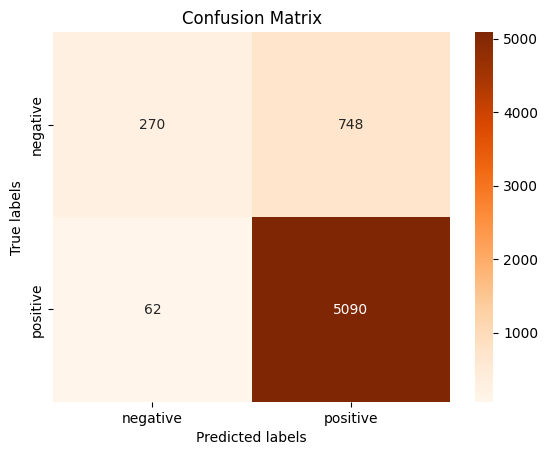

In [38]:
# confusion matrix
random_forest_predictions=random_forest.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,ranfrst_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Oranges');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']);
ax.yaxis.set_ticklabels(['negative', 'positive']);

In [40]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Original Product. Great Performance.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(random_forest.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [42]:
# K-Nearest Neighbor model
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train_tvec, Y_train)

KNeighborsClassifier()

In [43]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
knn_predictions = knn.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,knn_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("gray", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.730000,0.040000,0.080000,1018.000000
1,0.840000,1.000000,0.910000,5152.000000
accuracy,0.840000,0.840000,0.840000,0.840000
macro avg,0.790000,0.520000,0.500000,6170.000000
weighted avg,0.820000,0.840000,0.780000,6170.000000


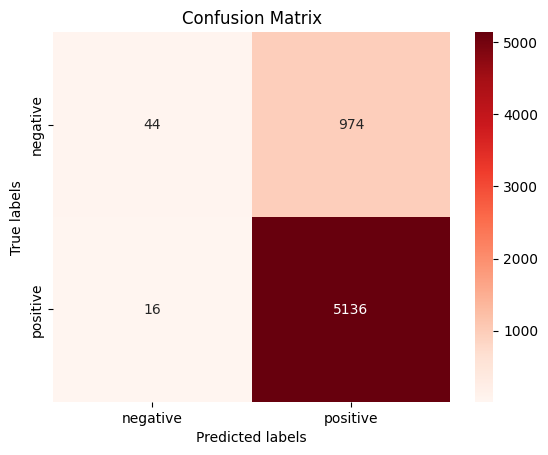

In [45]:
# confusion matrix


knn_predictions=knn.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,knn_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [46]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Bad product. Very much disappointed'])
demo_review_X_test = tvec.transform(demo_review)
print(knn.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [47]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Excellent product. Works well and performs as expected.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(knn.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [48]:
# Logistic regression model
lr = LogisticRegression()
lr.fit(X_train_tvec, Y_train)

LogisticRegression()

In [49]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
lr_predictions = lr.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("purple", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.790000,0.600000,0.680000,1018.000000
1,0.920000,0.970000,0.950000,5152.000000
accuracy,0.910000,0.910000,0.910000,0.910000
macro avg,0.860000,0.780000,0.810000,6170.000000
weighted avg,0.900000,0.910000,0.900000,6170.000000


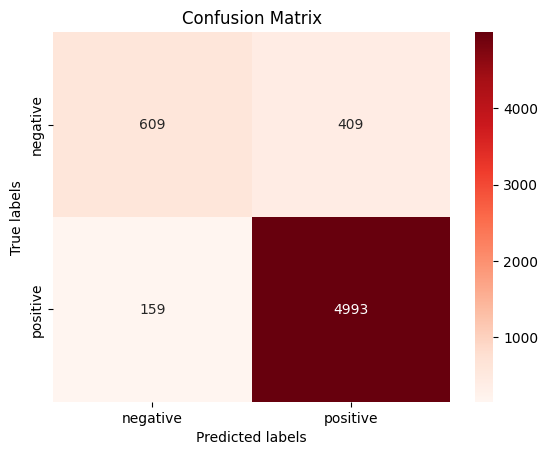

In [50]:
# confusion matrix
lr_predictions=lr.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [51]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Poor quality. Faulty device.'])
demo_review_X_test = tvec.transform(demo_review)
print(lr.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [52]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Best product.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(lr.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [53]:
X_test

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
29301,US,14838102,R7IJPG60A4VWG,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,8,8,N,N,Good but not great,I would give this 5 stars but the frustration ...,30-11-2014
19920,US,1191454,R2OOV5F4V6BSR3,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,perfect,11-01-2015
17408,US,37457316,R2FEWTUJ7VLR8Q,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,great deal,It does everything that is advertised,28-01-2015
2898,US,48533314,R35Y6OTXB0YJOH,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1,1,N,N,Five Stars,My husband loves it !,15-07-2015
22257,US,19313349,R284PYAQNLCDZX,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,nice and useful,I like this Kindle. It's easy to use and the l...,05-01-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15448,US,8507185,R30CK5OQ0BX1QP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,addicted,Love it!,16-02-2015
1009,US,47386214,RTO0B2P8MV0JX,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,"Great gift, even for dads","My wife got this for my birthday, I stayed up...",12-08-2015
24705,US,1471625,R1RH2BRTWM6BI5,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Great,It is a great iteam the only down size is that...,02-01-2015
26320,US,21185945,R1SKVYV6483YW6,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1,1,N,Y,great apps to choose from,I'm really enjoying my Fire HD 7! Definitely a...,24-12-2014


In [54]:
Testing_Output=X_test

In [55]:
Testing_Output['Review']=svr_lin_predictions

In [56]:
Testing_Output

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Review
29301,US,14838102,R7IJPG60A4VWG,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,8,8,N,N,Good but not great,I would give this 5 stars but the frustration ...,30-11-2014,1
19920,US,1191454,R2OOV5F4V6BSR3,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,perfect,11-01-2015,1
17408,US,37457316,R2FEWTUJ7VLR8Q,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,great deal,It does everything that is advertised,28-01-2015,1
2898,US,48533314,R35Y6OTXB0YJOH,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1,1,N,N,Five Stars,My husband loves it !,15-07-2015,1
22257,US,19313349,R284PYAQNLCDZX,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,nice and useful,I like this Kindle. It's easy to use and the l...,05-01-2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15448,US,8507185,R30CK5OQ0BX1QP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,addicted,Love it!,16-02-2015,1
1009,US,47386214,RTO0B2P8MV0JX,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,"Great gift, even for dads","My wife got this for my birthday, I stayed up...",12-08-2015,1
24705,US,1471625,R1RH2BRTWM6BI5,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Great,It is a great iteam the only down size is that...,02-01-2015,1
26320,US,21185945,R1SKVYV6483YW6,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1,1,N,Y,great apps to choose from,I'm really enjoying my Fire HD 7! Definitely a...,24-12-2014,1


In [57]:
Testing_Output['Review'] = Testing_Output['Review'].replace({1: 'Positive', 0: 'Negative'})

In [58]:
Testing_Output.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'Review'],
      dtype='object')